### ED Figure 11

In [1]:
%run IMP.ipynb

#### Input Data

In [2]:
lat,dep = age_mean.lat,age_mean.dep
nexp = 3
age_anom = xr.DataArray(np.zeros((nexp,dep.size,lat.size)))
age_anom[0,:,:] = age_wthmp - age_cntl
age_anom[1,:,:] = age_wthp  - age_cntl
age_anom[2,:,:] = age_wthmp - age_wthp

#### Plot

In [3]:
levs_age_mean = np.arange(0,240+1,15)
levs_age_anom = np.arange(0,1.01,0.1)*25

In [4]:
def make_plot4():
    ''''''
    ncol,nrow = 2,2
    
    xx = [-85,85]    
    x_ticks,x_ticklabels = cal_lat_label([-80,80+1,20])
    yy = [dep[dep.size-1],dep[0]]
    y_ticks,y_ticklabels = cal_dep_label()
    
    subtitles = ['CTRL','Wind$+$Thermal+Meltwater','Wind$+$Thermal','Meltwater Component']
    labels = ['a)','b)','c)','d)']
    ''''''
    fig,ax = plt.subplots(nrow,ncol,figsize=(7.5*ncol,4*nrow))
    plt.subplots_adjust(wspace=0.04,hspace=0.075*2)
    kk=0
    for ii in np.arange(0,nrow,1):
        for jj in np.arange(0,ncol,1):
            ax = plt.subplot(nrow,ncol,kk+1)
            ax.set_facecolor('silver')
            if kk==0:
                p1 = plt.contourf(lat,dep,age_mean,levels=levs_age_mean,cmap=colormap_age_mean,zorder=0,extend='both')
            if kk!=0:
                q1 = plt.contourf(lat,dep,age_anom[kk-1,:,:],levels=levs_age_anom,cmap=colormap_age_anom,zorder=0,extend='both')
            c1 = plt.contour(lat,dep,age_mean,levels=levs_age_mean,colors='black',linestyles='-',linewidths=0.5,zorder=5)
            
            ax.set_title(subtitles[kk],fontsize=15,loc='center',y=0.995)
            ax.set_title(labels[kk]+' AGE',fontsize=14.5,loc='left',x=0.855,y=0.02)
            kk=kk+1
            
            plt.gca().invert_yaxis()
            plt.xlim(xx)
            plt.ylim(yy)
            plt.xticks(x_ticks,x_ticklabels)
            plt.yticks(y_ticks,y_ticklabels)
            plt.tick_params(labelsize=10,direction='out',length=5)
            plt.ylabel('Depth [km]',fontsize=11,labelpad=5)
            
    for ax in fig.get_axes():
        ax.label_outer()
        
    # Plot a colorbar    
    cax1 = plt.axes([0.93,0.529,0.01,0.35])
    cax2 = plt.axes([0.93,0.125,0.01,0.35])
    cb1 = plt.colorbar(p1,cax=cax1,orientation='vertical',ticks=levs_age_mean[::2])
    cb2 = plt.colorbar(q1,cax=cax2,orientation='vertical',ticks=levs_age_anom[::2])
    cb1.ax.set_ylabel('Climatological Age ['+unit_age+']',fontsize=11.5,labelpad=2)
    cb2.ax.set_ylabel('Age Anomaly ['+unit_age+']',fontsize=11.5,labelpad=2)
    cb1.ax.tick_params(axis='y',direction='in',length=6,labelsize=10.5)
    cb2.ax.tick_params(axis='y',direction='in',length=6,labelsize=10.5)
    cax1.yaxis.set_label_position('left')
    cax2.yaxis.set_label_position('left')

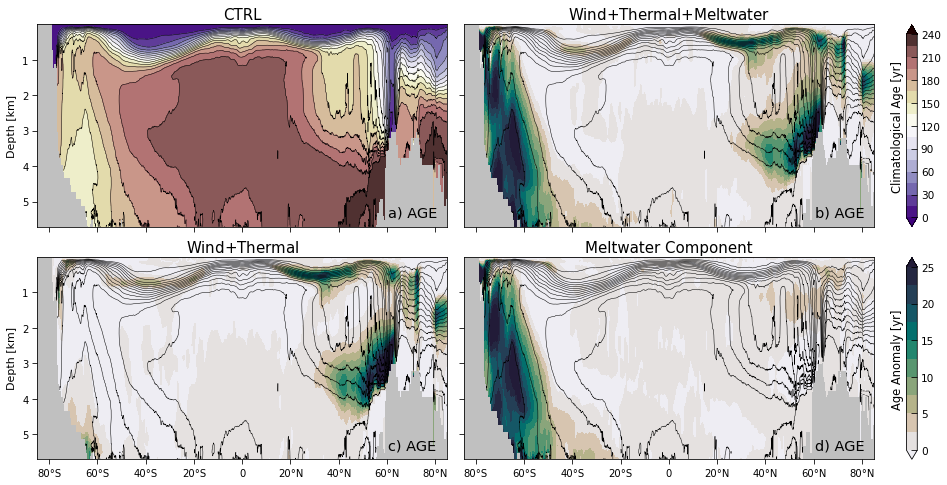

In [5]:
make_plot4()